In [9]:
import torch
from d2l import torch as d2l
import os
from torch.nn import functional as F
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    """matrices的形状是 （要显示的行数，要显示的列数，查询的数目，键的数目）"""
    """查询(query)为不随意线索，键(key)为随意线索"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

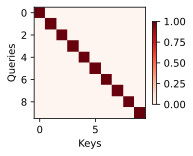

In [11]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

tensor([[0.1826, 0.1837, 0.0202, 0.0232, 0.0712, 0.0986, 0.0730, 0.0345, 0.2342,
         0.0789],
        [0.0698, 0.0303, 0.2526, 0.0427, 0.1076, 0.1115, 0.1635, 0.1188, 0.0623,
         0.0408],
        [0.0513, 0.0370, 0.1268, 0.0113, 0.1069, 0.0533, 0.0952, 0.0341, 0.3974,
         0.0868],
        [0.1006, 0.0601, 0.0929, 0.0393, 0.0681, 0.0457, 0.0344, 0.2483, 0.0104,
         0.3002],
        [0.1677, 0.0265, 0.0406, 0.1485, 0.0164, 0.0672, 0.0212, 0.0941, 0.0395,
         0.3783],
        [0.0976, 0.2704, 0.0260, 0.1105, 0.0597, 0.2650, 0.0550, 0.0874, 0.0240,
         0.0045],
        [0.0330, 0.1554, 0.0861, 0.1102, 0.3199, 0.0378, 0.0727, 0.0612, 0.0362,
         0.0877],
        [0.0394, 0.1233, 0.1785, 0.0339, 0.0215, 0.0251, 0.0779, 0.2826, 0.1840,
         0.0337],
        [0.0609, 0.2287, 0.1139, 0.1150, 0.1459, 0.0154, 0.0958, 0.0580, 0.0537,
         0.1128],
        [0.0700, 0.0679, 0.0111, 0.1021, 0.1152, 0.2169, 0.1362, 0.0263, 0.0921,
         0.1622]])


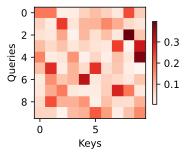

In [12]:
X = torch.randn((10, 10))
X = F.softmax(X, dim=1)
print(X)
show_heatmaps(X.reshape(1, 1, 10, 10), xlabel='Keys', ylabel='Queries')